## Fashion MNIST  with Keras & TensorBoard
___
In this notebook I try to get TensorBoard working on a model created using Keras. TensorBoard comes with TensorFlow and allows for easy visualization of different model architectures and their performances. The dataset used is "Fashion MNIST" and was obtained from Kaggle: https://www.kaggle.com/zalando-research/fashionmnist
___
Reference:

Most of what is in this notebook was learned from https://www.pinchofintelligence.com/simple-introduction-to-tensorboard-embedding-visualisation/ and the MarkJay Youtube channel https://www.youtube.com/channel/UC2W0aQEPNpU6XrkFCYifRFQ/ series on "FashionMNIST Keras + TensorFlow".
___


In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

%matplotlib inline

C:\Users\Marvin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Retrieve the dataset
train = pd.read_csv(r'Datasets\fashionmnist\fashion-mnist_train.csv')
test = pd.read_csv(r'Datasets\fashionmnist\fashion-mnist_test.csv')

In [3]:
# Take a look at what the dataset looks like
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [4]:
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


In [5]:
# Separate our features from labels
X_train = train.drop('label', axis=1)
X_test = test.drop('label', axis=1)
y_train = train['label']
y_test = test['label']

In [6]:
# Check to see if it worked
X_train.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0


In [7]:
y_train.head(3)

0    2
1    9
2    6
Name: label, dtype: int64

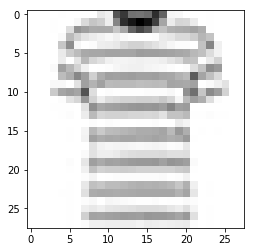

In [8]:
# An example from the dataset
image = X_train.iloc[np.random.randint(len(X_train))].values.reshape(28,28)
plt.imshow(image, cmap = 'binary')

## Creating our Model
___
Now that we have seen what our data looks like it is time to preprocess it and create a model. To preprocess the data we will simply divide each value in X_train and X_test by 255 so that they take on a value between 0 and 1, and reshape them to be of shape (28, 28, 1). We then create a convolutional neural network and fit it to the training set.

In [9]:
# Normalize the data and let's use numpy arrays instead of dataframes
X_train = X_train.values / 255
X_test = X_test.values / 255

In [10]:
# Reshape X_train and X_test to have the shape of the image
X_train_image = X_train.reshape(-1, 28, 28, 1)
X_test_image = X_test.reshape(-1, 28, 28, 1)

In [11]:
# Create a ConvNet
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1), name='conv2d_1'),
    Dropout(rate=0.2, name='dropout_1'),
    Conv2D(filters=64, kernel_size=3, activation='relu', name='conv2d_2'),
    MaxPooling2D(pool_size=(2, 2), name='maxpool_2'),
    Dropout(rate=0.2, name='dropout_2'),
    Conv2D(filters=128, kernel_size=3, activation='relu', name='conv2d_3'),
    Dropout(rate=0.2, name='dropout_3'),
    Conv2D(filters=128, kernel_size=3, activation='relu', name='conv2d_4'),
    MaxPooling2D(pool_size=(2, 2), name='maxpool_4'),
    Dropout(rate=0.2, name='dropout_4'),
    Flatten(name='flatten'),
    Dense(units=128, activation='relu', name='dense'),
    Dense(units=10, activation='softmax', name='output')], 
    name='6-layer_ConvNet'
)

In [12]:
# Check out the details of our ConvNet
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 128)       0         
__________

In [13]:
# To see the model on TensorBoard we create a TensorBoard callback that writes a log for TensorBoard
tensorboard = TensorBoard(
    log_dir=r'logs\FashionMNIST_Keras_TensorBoard\{}'.format(model.name), # choose your own logging directory
    histogram_freq=1,
    write_graph=True,
    write_grads=True,
    write_images=True
)

In [14]:
# Compile our model
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy', # since labels are not one-hot encoded
    metrics = ['accuracy']
)

In [15]:
# Fit our model to the training set
model.fit(
    x=X_train_image, 
    y=y_train, 
    batch_size=128, 
    epochs=25, 
    callbacks=[tensorboard], 
    validation_split=0.2 # validation set to measure performance during training
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 15s 312us/step - loss: 0.6200 - acc: 0.7701 - val_loss: 0.3930 - val_acc: 0.8588
Epoch 2/25
48000/48000 [==============================] - 13s 271us/step - loss: 0.3620 - acc: 0.8661 - val_loss: 0.3037 - val_acc: 0.8926
Epoch 3/25
48000/48000 [==============================] - 13s 269us/step - loss: 0.3064 - acc: 0.8885 - val_loss: 0.2942 - val_acc: 0.8924
Epoch 4/25
48000/48000 [==============================] - 13s 272us/step - loss: 0.2734 - acc: 0.8991 - val_loss: 0.2526 - val_acc: 0.9088
Epoch 5/25
48000/48000 [==============================] - 13s 266us/step - loss: 0.2527 - acc: 0.9068 - val_loss: 0.2445 - val_acc: 0.9107
Epoch 6/25
48000/48000 [==============================] - 13s 266us/step - loss: 0.2339 - acc: 0.9129 - val_loss: 0.2497 - val_acc: 0.9116
Epoch 7/25
48000/48000 [==============================] - 22s 455us/step - loss: 0.2189 - acc: 0.9188 - val_loss: 0.

In [16]:
# Finally let's evaluate the model on the test set
test_loss, test_acc = model.evaluate(x=X_test_image, y=y_test)
print('test loss:', test_loss)
print('test acc:', test_acc)

10000/10000 [==============================] - 3s 346us/step
test loss: 0.2232707907795906
test acc: 0.9294


## Opening model on TensorBoard
___
After training open up a new command/Anaconda prompt and type the following: 

tensorboard --logdir *"path name"*

where the *"path name"* is where you saved the log. You should be returned a local address, for example, http://localhost:6006, which you can use to access TensorBoard.

## Visualizing our Dataset on TensorBoard
___
One neat feature of TensorBoard is the ability to visualize high dimensional data in 2D or 3D using Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). In this example we project our input data into 3D space, however, it is more common to project an embedding/encoding, for example, the layer just before the output layer, into 3D space. Because we don't want to clutter the 3D projection, we will only use 1024 images.

In [30]:
# Select 1024 random images from the test set to be projected into the 3D space
perm = np.random.permutation(len(X_test))
X_test_shuffled = X_test[perm, :]
y_test_shuffled = y_test[perm]
X_test_emb = X_test_shuffled[:1024, :]
y_test_emb = y_test_shuffled[:1024].values

In [31]:
# Save the logging directory into a variable for easy access

# The same logdir as the one used before. I suggest you use the entire address.
LOGDIR = r'C:\Users\Marvin\Desktop\MachineLearning\Code\logs\FashionMNIST_Keras_TensorBoard\{}'.format(model.name)

In [32]:
# Configure the Projector that will display the graphs in TensorBoard

# Choose our embeddings we want to display
embedding = tf.Variable(X_test_emb, name='test_embedding') 

# Create a FileWriter so that we can write our configurations in
writer = tf.summary.FileWriter(LOGDIR)

# Configure the Projector
config = tf.contrib.tensorboard.plugins.projector.ProjectorConfig()
embedding_config = config.embeddings.add()
embedding_config.tensor_name = embedding.name
embedding_config.sprite.image_path = os.path.join(LOGDIR, 'sprite_1024.png') # where to store spritesheet
embedding_config.metadata_path = os.path.join(LOGDIR, 'labels_1024.tsv') # where to store metadata (labels)
embedding_config.sprite.single_image_dim.extend([28, 28]) # specify the size of an image
    
# Write in the Projector configurations
tf.contrib.tensorboard.plugins.projector.visualize_embeddings(writer, config)


In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sess, os.path.join(LOGDIR, 'model.ckpt'))

In [34]:
# Convert y_test_emb from digits to strings
labels = pd.Series(y_test_emb)
labels = labels.map({0: 't_shirt', 
                     1: 'trouser',
                     2: 'pullover',
                     3: 'dress',
                     4: 'coat',
                     5:'sandal', 
                     6: 'shirt', 
                     7:'sneaker', 
                     8:'bag', 
                     9:'ankle_boot'}
                   )

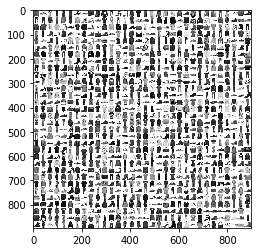

In [35]:
# Create a sprite containing all images used for visualization
img_h = 28
img_w = 28
sprite_dim = int(np.ceil(np.sqrt(len(X_test_emb))))

sprite_img = np.zeros((img_h * sprite_dim, img_w * sprite_dim))

index = 0
for i in range(sprite_dim):
    for j in range(sprite_dim):
        sprite_img[i * img_h: (i + 1) * img_h, j * img_w: (j + 1) * img_w] \
            = X_test_emb[index].reshape(28, 28)
        
        index += 1

# Write in the metadata
with open(embedding_config.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))

# Save the sprite
plt.imsave(embedding_config.sprite.image_path, sprite_img, cmap='binary')
plt.imshow(sprite_img, cmap='binary')

And finally to view the visualization open TensorBoard and check the Projector tab.